# Can We Trust Yelp?  ---Yelp data analysis
By Shihui Li, Haoran Shi, Jixing wei, Zack Liu

## Table of content

1. **Introduction** 
2. **Data Preparation**
    1. Web Scraping
    2. Using Yelp dataset
    3. Preprocessing and SQL
3. **Exploratory data analysis**
    1. Business
    2. Checkins
    3. Reviews and stars 
    4. Conclusion
4. **NLP and Machine Learning**
    1. NLP
    2. MAchine Learning
5. **Application and Conclusion**


## 1. Introduction
> Have you ever fool by a five stars restaurant on Yelp or surprise by a one star restaurant on Yelp?

## 2. Data Preparation

### 2.1 Web Scaping (code  in webscraping.ipynb)
>First, we wanted to use Yelp API to scrape the data we need. The data we scrapped is in json format, so we built a function to turn the data into a pandas dataframe.  The following is a example of the data we scraped from Yelp.

`web_result.head()`

In [1]:
import requests
import pandas as pd
import numpy as np
key = "myiehrlImSEu0GOj4V2FzswMPhpyVxUgGC5k5m_asaaYvmfTeBcUNnRGamxeTTqqHWW9Autb3gz-CMpT6_VNQPs5UZr5he4c_UjT_NrSagIJQIQEamLvqhclnd3oW3Yx"
params = {'term': 'restaurants', 'location': 'Sacramento','limit':50}
url = "https://api.yelp.com/v3/businesses/search"
headers = {
        'Authorization': 'Bearer %s' % key,
    }
req = requests.get(url,params=params,headers=headers)
js = req.json()

def extract_one_restaurant(dic):
    ID = dic['id']
    alias = dic['alias']
    name = dic['name']
    image_url = dic['image_url']
    is_closed = dic['is_closed']
    url = dic['url']
    review_count = dic['review_count']
    categories = [i['alias'] for i in dic['categories']]
    rating = dic['rating']
    coordinates = tuple(dic['coordinates'].values())
    transactions = dic['transactions']
    try :
        price = dic['price']
    except:
        price = np.nan
    address1 = dic['location']['address1']
    address2 = dic['location']['address2']
    address3 = dic['location']['address3']
    city = dic['location']['city']
    zip_code = dic['location']['zip_code']
    country = dic['location']['country']
    state = dic['location']['state']
    display_address = dic['location']['display_address']
    phone = dic['phone']
    display_phone = dic['display_phone']
    distance = dic['distance']
    dic2 = {'id':ID, 'alias':alias, 'name':name, 'image_url':image_url, 'is_closed':is_closed, 'url':url, 
            'review_count':review_count, 'categories':categories, 'rating':rating, 'coordinates':coordinates,
            'transactions':transactions, 'address1':address1, 'address2':address2, 
            'address3':address3, 'city':city, 'zip_code':zip_code, 'country':country, 'state':state, 
            'display_address':display_address, 'phone':phone, 'display_phone':display_phone, 'distance':distance}
    return dic2

web_result= pd.DataFrame(extract_one_restaurant(i) for i in js['businesses'])

web_result.head()

,address1,address2,address3,alias,categories,city,coordinates,country,display_address,display_phone,...,image_url,is_closed,name,phone,rating,review_count,state,transactions,url,zip_code
0,1831 S St,,,ramen-house-ryujin-sacramento,"[ramen, noodles]",Sacramento,"(38.5674, -121.4857)",US,"[1831 S St, Sacramento, CA 95811]",(916) 341-0488,...,https://s3-media4.fl.yelpcdn.com/bphoto/bsL_mG...,False,Ramen House Ryujin,+19163410488,4.5,2403,CA,[],https://www.yelp.com/biz/ramen-house-ryujin-sa...,95811
1,4740 Natomas Blvd,Ste 120,None,bonchon-natomas-sacramento,"[korean, chicken_wings, asianfusion]",Sacramento,"(38.659146, -121.511556)",US,"[4740 Natomas Blvd, Ste 120, Sacramento, CA 95...",(916) 285-7888,...,https://s3-media3.fl.yelpcdn.com/bphoto/C0UpqW...,False,Bonchon - Natomas,+19162857888,3.5,139,CA,[],https://www.yelp.com/biz/bonchon-natomas-sacra...,95835
2,2790 Stockton Blvd,,None,orange-oven-sacramento-2,"[mediterranean, halal, tradamerican]",Sacramento,"(38.549544, -121.4550539)",US,"[2790 Stockton Blvd, Sacramento, CA 95817]",(916) 533-7727,...,https://s3-media4.fl.yelpcdn.com/bphoto/K8j-a1...,False,Orange Oven,+19165337727,4.5,79,CA,[],https://www.yelp.com/biz/orange-oven-sacrament...,95817
3,1118 16th St,,None,station-16-sacramento-2,"[seafood, bars, breakfast_brunch]",Sacramento,"(38.576459, -121.486352)",US,"[1118 16th St, Sacramento, CA 95814]",(916) 228-4042,...,https://s3-media1.fl.yelpcdn.com/bphoto/K2H-vI...,False,Station 16,+19162284042,4.0,1215,CA,"[delivery, pickup]",https://www.yelp.com/biz/station-16-sacramento...,95814
4,4801 Folsom Blvd,Ste 1,None,origami-asian-grill-sacramento,[asianfusion],Sacramento,"(38.56171, -121.44581)",US,"[4801 Folsom Blvd, Ste 1, Sacramento, CA 95819]",(916) 400-3075,...,https://s3-media1.fl.yelpcdn.com/bphoto/j8ZunX...,False,Origami Asian Grill,+19164003075,4.5,120,CA,[],https://www.yelp.com/biz/origami-asian-grill-s...,95819


>However, there are some limitations for using Yelp API, such as, number of queries we can call each day. Thus, we are not able to get a sufficient amount of data by using Yelp API. Fortunately, Yelp provides a competition dataset for us to download and use.

### 2.2 Using Yelp dataset

>The [dataset](https://www.yelp.com/dataset/) we downloaded from the Yelp consists of 6 json files: business, review, checkin, tip, photo,user. However, we only interest in business, review, and checkin. Also, the format of json file is very similar to what we can scrape by using Yelp API. The following is what the business and checkin looks like by read in the josn files directly using `pd.read_json` .

`business.head()`

In [2]:
business=pd.read_json("yelp_dataset/yelp_academic_dataset_business.json",lines=True)
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,1314 44 Avenue NE,"{'BikeParking': 'False', 'BusinessAcceptsCredi...",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Ho...",Calgary,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,24,4.0,AB
1,,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendo...",Henderson,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,3,4.5,NV
2,1335 rue Beaubien E,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandw...",Montréal,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,211 W Monroe St,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,None,1,33.449999,-112.076979,Geico Insurance,,85003,8,1.5,AZ
4,2005 Alyth Place SE,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping...",Calgary,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1,51.035591,-114.027366,Action Engine,,T2H 0N5,4,2.0,AB


`checkin.head()`

In [3]:
checkin=pd.read_json("yelp_dataset/yelp_academic_dataset_checkin.json",lines=True)
checkin.head()

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': ..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-1..."
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16'..."
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}"
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23..."


`review.head()`

In [4]:
review=pd.read_json("yelp_dataset/yelp_academic_dataset_review.json",lines=True,chunksize=1000)
next(review).head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


### 2.3 Preprocessing and SQL  ( Code in preprocessing_sql.ipynb)
>**Basic idea :** Since the business and checkin are not well structured, we need to do some preprocessing to turn the data into a tidy format. The review file is very large, so we can not just read in the whole file into the memory. All three data has a common column `business_id`. Therefore, we decided to store the data into a sql database as separate tables after some preprocessing. One benefit is that we can query the data we need without reading everything into memory.

> For business, we separated column `attribute` and `hours` from the dataframe and store them into sql as separate tables, because each of them is a column of dictionaries. We also simplify the `categories` column by only using one most "meaningful" term for each business. The following is what the business looks like after preprocessing

In [5]:
import sqlalchemy as sqla
conn = sqla.create_engine('sqlite:///yelp.sqlite')
business=pd.read_sql_table("business",conn)

`business.head()`

In [6]:
business.head()

,business_id,address,categories,city,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,Apn5Q_b6Nz61Tq4XzPdf9A,1314 44 Avenue NE,Restaurants,Calgary,1,51.091813,-114.031675,Minhas Micro Brewery,None,T2E 6L6,24,4.0,AB
1,AjEbIBw6ZFfln7ePHha9PA,None,Restaurants,Henderson,0,35.960734,-114.939821,CK'S BBQ & Catering,None,89002,3,4.5,NV
2,O8S5hYJ1SMc8fA4QBtVujA,1335 rue Beaubien E,Restaurants,Montréal,0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,5,4.0,QC
3,bFzdJJ3wp3PZssNEsyU23g,211 W Monroe St,FinancialServices,Phoenix,1,33.449999,-112.076979,Geico Insurance,None,85003,8,1.5,AZ
4,8USyCYqpScwiNEb58Bt6CA,2005 Alyth Place SE,Shopping,Calgary,1,51.035591,-114.027366,Action Engine,None,T2H 0N5,4,2.0,AB


>For checkin, we converted each dictionary into different rows and columns, so each row is one observation and each columns is one feature.

`checkin.head()`

In [7]:
checkin=pd.read_sql_table("checkin",conn)
checkin.head()

,business_id,weekday,hour,checkins
0,--cZ6Hhc9F7VkKXxHMVZSQ,Fri,0,18.0
1,-06-Fdi30wJx-JA8P7CAng,Fri,0,2.0
2,-0CTrPQNiSyClxhdO4HSDQ,Fri,0,2.0
3,-1xCh7Cocn6IwFzhELyohA,Fri,0,2.0
4,-5L8zOxibac-vBrsYtxXbQ,Fri,0,18.0


## 3. Exploratory Data Analysis (Detail Code in EDA.ipynb)

### 3.1 Explore the Business Data

#### Where are the data from?

> First, we want to know where are the major businesses provided in Yelp dataset from. We plotted a bar plot that visualizes the cities where major businesses in the dataset from.

In [8]:
import plotnine as p9
#which cities the major data from
major_count=business.city.value_counts()[business.city.value_counts(ascending=False)>4000].sort_values(ascending=True)
major_city=pd.DataFrame({"city":major_count.index,"count":major_count.values})
p9.ggplot(major_city,p9.aes(x="city",y="count"))+p9.geom_bar(stat="identity",fill="C0",alpha=0.7)+p9.coord_flip()\
    +p9.scale_x_discrete (limits =major_city.city)+p9.labs(title="Major Cities Where the Business From")\
    +p9.scale_y_continuous(expand=[0,0,0.3,0])

<Figure size 640x480 with 1 Axes>

<ggplot: (-9223372036533636443)>

> As we can see from the plot, most of businesses in our dataset are from the metropolitan area in United States and Canada, like Las Vegas and Toronto. Therefore, the dataset provided by Yelp is not as representative as data scrapped by using Yelp API. Using API, we can query completely random businesses from all over the world.

#### Map Visualization

>Next, we plot each business on map by using the coordinates provided in the data. The package we use is plotly, a interactive plot package.

In [1]:
from IPython.display import IFrame
IFrame('images/Yelp_on_map1.html', width=900, height=500)

>From the map, we can see some of the businesses in the  data are from Asia and Europe. However, as we were examining carefully, we found that some geographic information provided by Yelp is incorrect. For example, Yelp provides incorrect coordinates for some businesses. We can see that many businesses we label in Asia are actually not in Asia.
So we wonder how many of them are mislabel. 

#### Detect Mislabel Businesses

>The algorithm we used to detect those mislabel businesses is Local Outliers Factor, which is a outlier detection algorithm. Our basic idea is to view those mislabel businesses as outliers. We first group the data by city and then apply the Local Outlier Factor to the groupby object. Thus, when a business is far away from other businesses in the same city, it will be detected.

#### Visualize Mislabel Businesses

>By tuning the parameters for the Local Outlier Factor, we had found that 612 businesses are mislabeled about 3% of all business. However, since we don't know what is the actual number of businesses are mislabeled, we were unable to verify the result we got. Nevertheless, we visualize the mislabeled businesses in the following. We had randomly selected some mislabel businesses and verified them by searching in google.

In [2]:
from IPython.display import IFrame
IFrame('images/Yelp_on_map2.html', width=900, height=500)

#### Number of Business per Catergory

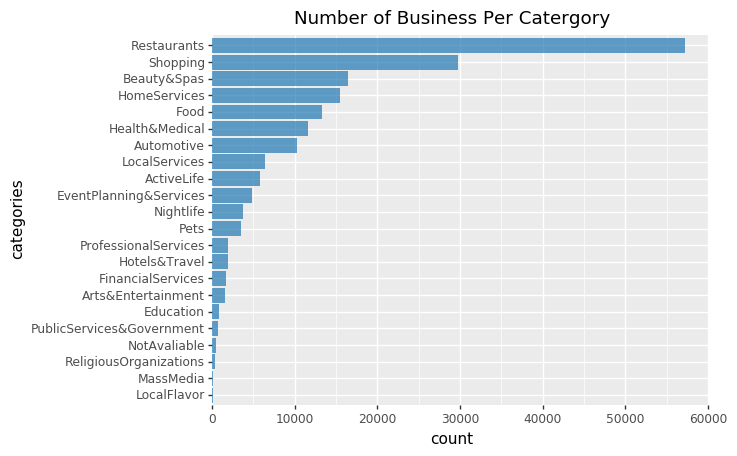

<ggplot: (321147049)>

In [11]:
#number of business per catergory
sorted_cate=business.categories.value_counts(ascending=True).index
p9.ggplot(business,p9.aes("categories"))+p9.geom_bar(fill="C0",alpha=0.7)+p9.coord_flip()\
    +p9.scale_x_discrete (limits =sorted_cate)+p9.labs(title="Number of Business Per Catergory")\
    +p9.scale_y_continuous(expand=[0,0],limits=[0,60000])

>Most of the businesses in Yelp are related to food and services. 

#### Businesses with Top 10 number of review counts

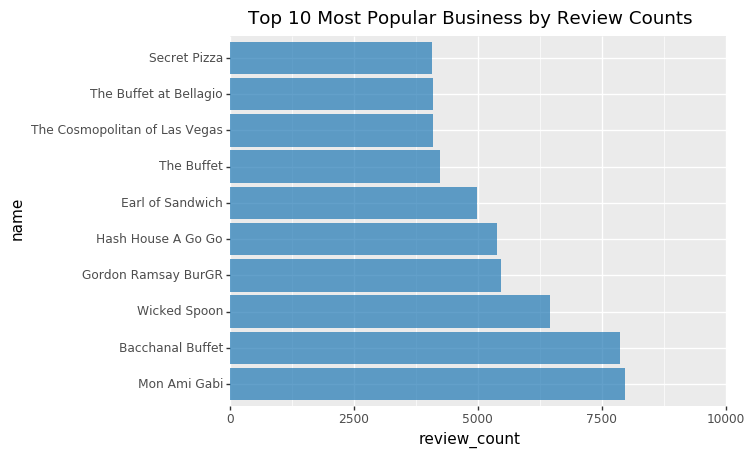

<ggplot: (322683512)>

In [12]:
#most popular business by Review Counts
top_10_review=business.loc[business.review_count.sort_values(ascending=False).index,:][:10]
p9.ggplot(top_10_review,p9.aes(x="name",y="review_count"))+p9.geom_bar(stat="identity",fill="C0",alpha=0.7)+p9.coord_flip()\
    +p9.scale_x_discrete (limits =top_10_review.name)+p9.labs(title="Top 10 Most Popular Business by Review Counts")\
    +p9.scale_y_continuous(expand=[0,0],limits=[0,10000])

### 3.1 Explore the Checkin Data

#### Businesses with Top 10 number of checkin counts

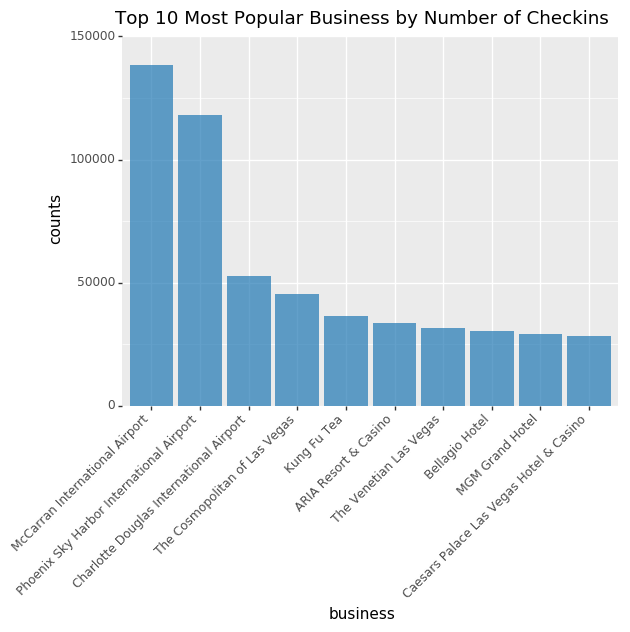

<ggplot: (-9223372036531601541)>

In [13]:
checkin=pd.read_sql_table("checkin",conn)
#most popular business by number of checkins
checkin_top10=checkin.groupby("business_id")["checkins"].sum().sort_values(ascending = False)[:10]
top10names = [list(business.name[business.business_id == i]) for i in checkin_top10.index]
checkin_top10_df = pd.DataFrame({'business': [i[0] for i in top10names], 'counts': checkin_top10})
p9.ggplot(checkin_top10_df, p9.aes(x='business', y='counts'))+p9.geom_bar(stat='identity',fill="C0",alpha=0.7) + \
    p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1))+\
    p9.labs(title="Top 10 Most Popular Business by Number of Checkins")+\
    p9.scale_x_discrete (limits =checkin_top10_df.business)+p9.scale_y_continuous(expand=[0,0],limits=[0,150000])

>Comparing this plot to the "Top 10 Most Popular business by Review Counts", we can see the businesses that people like to click for check in and review on Yelp app are different. People like to check in in place like airport, casino and hotel, but like to review for restaurants.

#### which day of week has the highest number of check in counts?

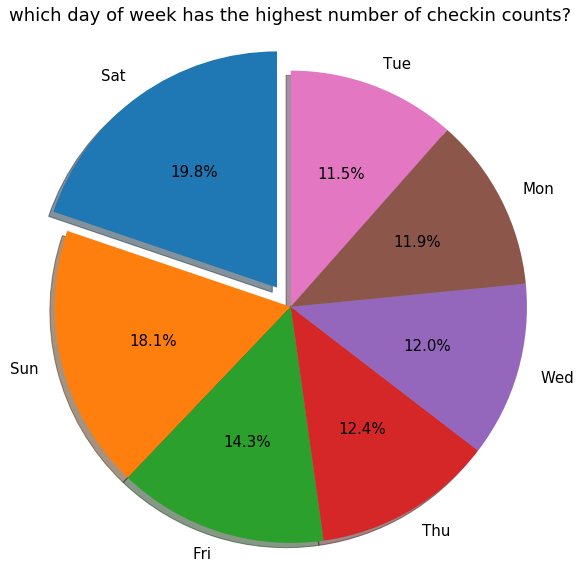

In [14]:
import matplotlib.pyplot as plt
#which day of week has the highest number of checkin counts?
checkin_dow_total = checkin.groupby('weekday')['checkins'].sum().sort_values(ascending = False)
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(checkin_dow_total.index)
sizes = np.array(checkin_dow_total/sum(checkin_dow_total)).round(4)*100
explode = (0.1, 0, 0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.rcParams.update({'font.size': 15})
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("which day of week has the highest number of checkin counts?")
plt.show()

> As what we expected, people tend to check in during weekend.

#### Total checkin counts in each hour of a day

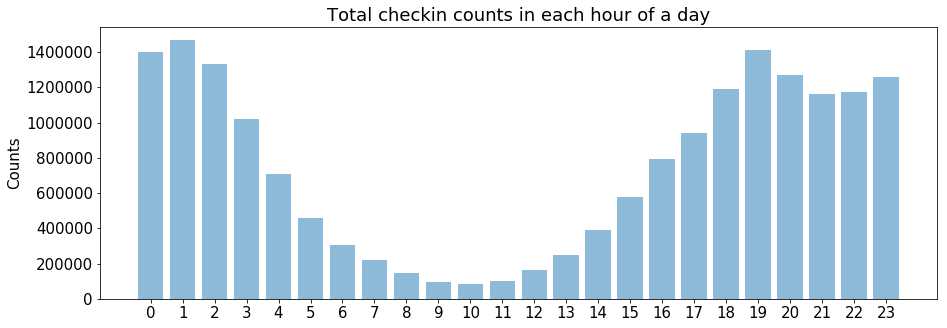

In [15]:
#Total checkin counts in 24 hours
checkin_hours_total = checkin.groupby("hour")['checkins'].sum()
hour = checkin_hours_total.index
counts = list(checkin_hours_total)
fig2, ax1 = plt.subplots(figsize=(15, 5))
plt.bar(hour, counts, align='center', alpha=0.5)
plt.xticks(hour)
plt.ylabel('Counts')
plt.title('Total checkin counts in each hour of a day')
plt.show()

> From the plot above, the peak of check in is between 7pm to 2am, and only very few checkins during the morning, which is kind of counter intuitive. Some thing can explain this is that, the data we are analyzing are from metropolitan areas and the businesses that people like to are airport, casino, and hotels. These business tend to open until late night.

### 3.3 Review and  Star

#### Is business stars on Yelp reliable ?
>We want to find out that whether the business stars on yelp are reliable, because all of us had been disappointed by some good star restaurants in the past.

>First, we plot a overall distribution of business stars on Yelp in the following.

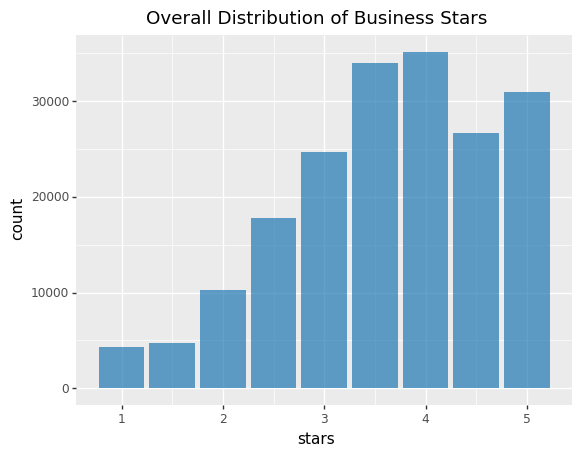

<ggplot: (-9223372036399035469)>

In [16]:
#Overall Distribution of Business Stars
p9.ggplot(business,p9.aes("stars"))+p9.geom_bar(fill="C0",alpha=0.7)\
    +p9.labs(title="Overall Distribution of Business Stars")

> We can see that the distribution is right skewed. Most of the business have more than 3.5 stars, and only very few businesses have one star. 

> Next, we want to add a variable "useful" into consideration. In Yelp app, user can mark a review useful if they think the review is indeed useful. We believe that the reviews that have more useful upvotes should be more significant and should have more influence on determine a business quality. Therefore, we recalculate the star for each business by using reviews corresponding to different number of useful upvotes, and the following density ridge plot shows the result.

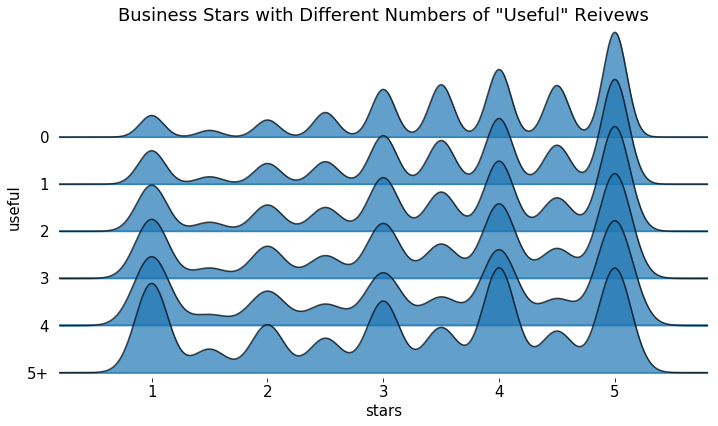

In [17]:
import joypy
#recalculate business star for diffferent number of useful
useful_stars=pd.read_sql_query("select business_id,stars,useful from review",conn)
useful_stars.drop(useful_stars[useful_stars.useful==-1].index,inplace=True)
useful_stars.loc[useful_stars.useful>4,"useful"]="5+"
starsByUseful=(round(useful_stars.groupby(["business_id","useful"]).mean()*2)/2).reset_index("useful")
starsByUseful.useful=starsByUseful.useful.astype("str")

#plot desnity rigde
fig, axes = joypy.joyplot(starsByUseful,by="useful",ylim="own",figsize=(10,6),\
                         title="Business Stars with Different Numbers of \"Useful\" Reivews",alpha=0.7)
axes[-1].set_xlabel("stars")
fig.text(0, 0.5, 'useful', va='center', rotation='vertical')
plt.show()

> From the plot above, we can see that as the number of useful upvotes increases, the proportion of one star reviews increases. Therefore, if we put more weight on the reviews that have more useful upvotes, the overall business stars should be lower than they are now.

#### What is in Yelp Review?

>Next, we want to know what is in Yelp review. More specifically, we want to know the difference between 0 useful reviews and 5+ useful upvotes reviews.The following word clouds display the difference. 

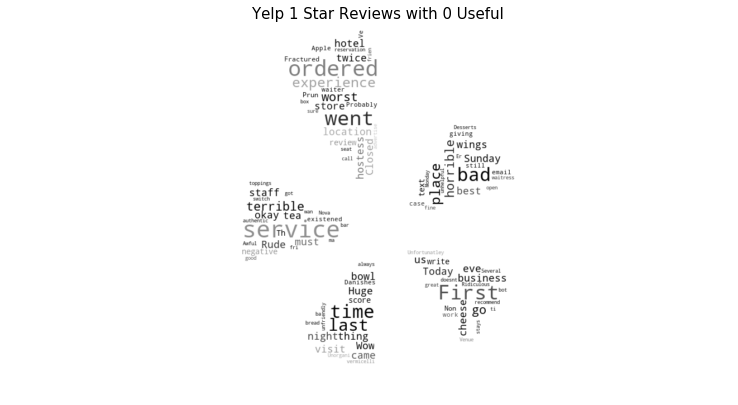

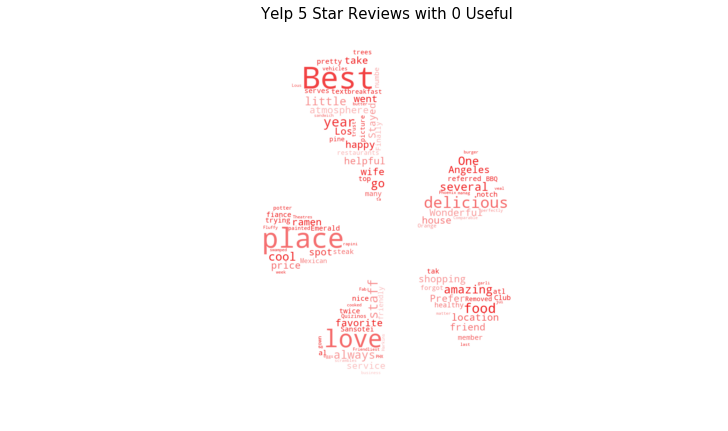

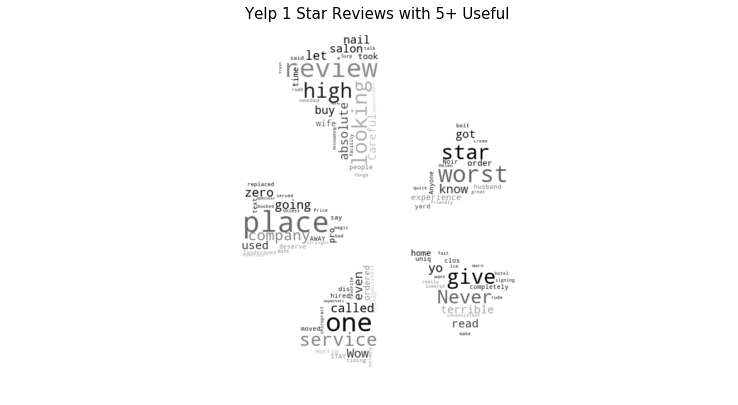

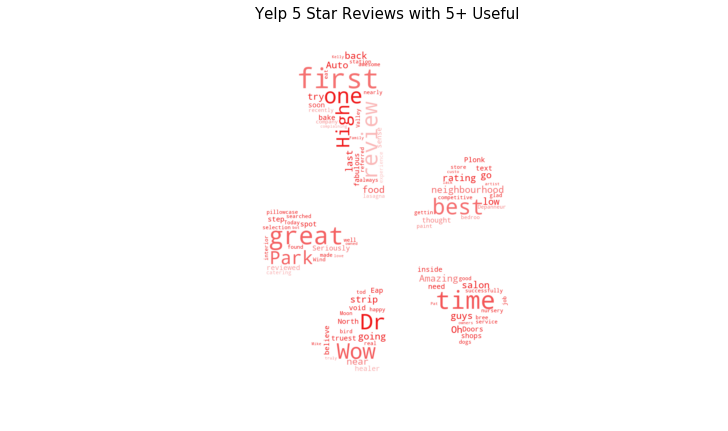

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image 
#reviews with 0 useful 
onestar_review_0=pd.read_sql_query("select text from review  where stars=1 and useful=0",conn)
fivestar_review_0=pd.read_sql_query("select text from review  where stars=5 and useful=0" ,conn)
#reviews with 1+ useful 
onestar_review_1=pd.read_sql_query("select text from review  where stars=1 and useful>=5",conn)
fivestar_review_1=pd.read_sql_query("select text from review  where stars=5 and useful>=5" ,conn)

#function for drawing wordclouds 
def draw_wordcloud(review,star,no_useful=True):
    """The function draw world from reviews
    Args:
        review(pd.DataFrame): reviews for worldcloud
        star(int): stars of reviews
        no_useful(boolean): indicates whether the reivews are useful
    """
    stopwords=set(STOPWORDS)
    if star==5:
        mask=np.array(Image.open("images/yelp.jpeg"))
    else:
        mask=np.array(Image.open("images/yelp.png"))
    image_colors=ImageColorGenerator(mask)
    wc=WordCloud(background_color='white',max_words=100,mask=mask, stopwords=stopwords)
    wc.generate(str(review))
    plt.figure(figsize=[12,12])
    plt.imshow(wc.recolor(color_func=image_colors),interpolation='bilinear')
    plt.axis("off")
    if no_useful==True:
        plt.title("Yelp {} Star Reviews with 0 Useful".format(star),fontdict={'fontsize':15})
    else:
        plt.title("Yelp {} Star Reviews with 5+ Useful".format(star),fontdict={'fontsize':15})
    plt.show()

draw_wordcloud(onestar_review_0,1)
draw_wordcloud(fivestar_review_0,5)
draw_wordcloud(onestar_review_1,1,False)
draw_wordcloud(fivestar_review_1,5,False)

> From the world clouds above, we can see that reviews with no useful upvotes have more adjectives, and reviews with 5+ useful upvotes have more nouns. The review with more nouns should be more specific and detail about what they like and they don't like. The following are random reviews we extracted. One review has no useful upvotes and another one has 5+ useful upvotes 

Review with no useful upvote <br>
`pd.read_sql_query("select text from review where useful=0 order by random() limit 1",conn).text[0] ` 

In [19]:
pd.read_sql_query("select text from review where useful=0 order by random() limit 1",conn).text[0]

'We ate here while we were at a party at The Clarendon Hotel. For the 4th of July (possibly always? Not sure) they had poolside service from this restaurant. The waitress was super friendly and helpful when taking our order and was prompt with drinks. \n\nI ordered the carne asada burro which came with fries. The meat in the burrito was actually really well cooked, fresh, and tasty. I like that the tortilla was toasted and still warm when the food was brought out to us. It was super messy and tough to eat, but still good and definitely worth having.\n\nThe price was super inexpensive for what we got (two meals and an alcoholic drink), only about $24. The only downside is that the service was a little slow on as far as getting the actual food out goes, and there were a few things we asked for but never got.\n\nBut I would come here again for sure.'

Review with 5+ useful upvotes <br>
`pd.read_sql_query("select text from review where useful>5 order by random() limit 1",conn).text[0]`

In [20]:
pd.read_sql_query("select text from review where useful>5 order by random() limit 1",conn).text[0]

"I've been to this place about three times and I'm still not tired of it! I have also been to the boiling crab in san jose, california but it does not compare to our louisiana style crawfish! If you do not like breaking the shells of the crawfish, shrimps are the way to go! There are also various seasoned flavors that the shrimps or crawfish are cooked in, but be prepared to taste a little spice! Oh! Another tip, be prepared to wait. Sometimes the waiting list is about an hour!! But you'll enjoy it overall. It is one thing everyone must experience! You get hot n juicy bibs and you also can get down and dirty with your hands, so you can choose to wear gloves. If you also like rice with your seafood, a bowl of rice is $2."

# 4. NLP and Machine Learning

###  Motivation

We believe the business stars on Yelp is biased and influenced by  non-useful reviews.In this project, we will use review text, the star that the user give the business, how many people think this review is useful and business attributes to perform NLP and machine learning and get a more reliable business stars for each business.

Below is a sample of review text that the user gave to the restaurant:

```python
test['text'][0] 
```

>"The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say..."

### 4.1 NLP
(This part corresponds to Machine Learning NLP.ipynb)

**We will perform the sentiment extraction on selected review text. In our case, we choose reviews that have more than 8 'useful' upvotes which we believe is a "good" review.**    



#### 4.1.1. The importance of sentiment analysis
>It's important to use sentiments to evaluate the review of business. Although 'stars' seems to be a sufficient estimator, it lacks objectivity. A person can give different stars under his/her certain mood even though the actual quality of the business is constant. Thus, bringing up sentiment into account is a good way of measuring the actually quality of the business

#### 4.1.2. Model selection

**We have 3 models to be experimented on: TextBlob, SpaCy Text Categorizer and Google NLP api:**               
1. TextBlob:   
Textblob doesn't have a acceptable accuracy especially for food review. Naivebayes is slow and inaccurate. I did a little research on how textblob calculates the sentiment. It turns out they have a XML file that contains polarity score for each words, and the overall polarity score is just the average of polarity scores of each word (Link: https://planspace.org/20150607-textblob_sentiment/ ). This is a poor way of estimating the sentiment score. Consider training my own NLP model.                                                
2. SpaCy Text Categorizer:  
SpaCy is a package that allows developer to build their own NLP model. The base model they provide is CNN.        
We use Amazon's food review dataset to train the model and the result is following:
         Warning: Unnamed vectors -- this won't allow multiple vectors models to be loaded. (Shape: (0, 0))
         Training the model...
         LOSS 	  P  	  R  	  F  
         204.768	0.910	0.983	0.945
         time for one iteration is 155.03080892562866
         123.836	0.925	0.975	0.949
         time for one iteration is 178.083074092865
         94.492	0.930	0.973	0.951
         time for one iteration is 176.36578583717346
         84.068	0.934	0.969	0.951
         time for one iteration is 181.42677283287048
         74.010	0.934	0.969	0.951
         time for one iteration is 185.3597228527069
         68.926	0.933	0.969	0.950
         time for one iteration is 188.23954820632935
         64.172	0.935	0.966	0.950
         time for one iteration is 177.8659210205078
         60.054	0.935	0.968	0.951
         time for one iteration is 180.7558081150055
         63.498	0.935	0.968	0.951
         time for one iteration is 178.3223419189453
         57.024	0.936	0.968	0.951
         time for one iteration is 174.05425381660461
         CPU times: user 48min 14s, sys: 1min 54s, total: 50min 9s
         Wall time: 29min 35s                  
The trained model doesn't perform well as well. The training takes 29 mins for just 10000 samples.         
3. Google NLP api:               
Google's API performs with the best accuracy. However, it costs.            

**Conclusion: Textblob is not accurate, SpaCy Text Categorizer is slow in terms of training, Google API is accurate but expensive. We will proceed with Google's API and Textblob since we don't have time for training the spacy model**
 


#### 4.1.3. Model selection

**We have 3 models to be experimented on: TextBlob, SpaCy Text Categorizer and Google NLP api:**               
1. TextBlob:   
Textblob doesn't have a acceptable accuracy especially for food review. Naivebayes is slow and inaccurate. I did a little research on how textblob calculates the sentiment. It turns out they have a XML file that contains polarity score for each words, and the overall polarity score is just the average of polarity scores of each word (Link: https://planspace.org/20150607-textblob_sentiment/ ). This is a poor way of estimating the sentiment score. Consider training my own NLP model.                                                
2. SpaCy Text Categorizer:  
SpaCy is a package that allows developer to build their own NLP model. The base model they provide is CNN.        
We use Amazon's food review dataset to train the model and the result is following:
         Warning: Unnamed vectors -- this won't allow multiple vectors models to be loaded. (Shape: (0, 0))
         Training the model...
         LOSS 	  P  	  R  	  F  
         204.768	0.910	0.983	0.945
         time for one iteration is 155.03080892562866
         123.836	0.925	0.975	0.949
         time for one iteration is 178.083074092865
         94.492	0.930	0.973	0.951
         time for one iteration is 176.36578583717346
         84.068	0.934	0.969	0.951
         time for one iteration is 181.42677283287048
         74.010	0.934	0.969	0.951
         time for one iteration is 185.3597228527069
         68.926	0.933	0.969	0.950
         time for one iteration is 188.23954820632935
         64.172	0.935	0.966	0.950
         time for one iteration is 177.8659210205078
         60.054	0.935	0.968	0.951
         time for one iteration is 180.7558081150055
         63.498	0.935	0.968	0.951
         time for one iteration is 178.3223419189453
         57.024	0.936	0.968	0.951
         time for one iteration is 174.05425381660461
         CPU times: user 48min 14s, sys: 1min 54s, total: 50min 9s
         Wall time: 29min 35s                  
The trained model doesn't perform well as well. The training takes 29 mins for just 10000 samples.         
3. Google NLP api:               
Google's API performs with the best accuracy. However, it costs.            

**Conclusion: Textblob is not accurate, SpaCy Text Categorizer is slow in terms of training, Google API is accurate but expensive. We will proceed with Google's API and Textblob since we don't have time for training the spacy model**
 


#### 4.1.4. Sentiment analysis

* **Question: What's the relationship between review star and sentiments?**
<img src= "images/review_starsvsse.png">
It's not clear how they are related. Ideally, we expect high sentiment with how review score. However, this is not the case here.

* **Questions: why there are some reviews having high stars but with low sentiments and vice versa?**         
Check the review that has difference of stars and sentiments bigger than 1.5  

```python
df[abs(a - df['sentiments']) > 1.5].reset_index().loc[1,'text']
```
>the vacuums suck, that's for sure\nsnagged a twenty, inside door\npocket, swept it, straight away\ncest le vie, most would say\nbut I asked, "could it be found?"\n"sure, we'll shut, the vacuums down"\nowners, no less, had to go\nto a place, only, Mike Rowe\nof Dirty Jobs, would lurk around\nthe filth, from every car in town\ncollecting, in some giant vat\nwhile they looked, there I sat\nadmiring, this great idea\nand how, ideas, are crystal clear\nto some, but not to others\nbuild a better mouse trap, brother\nwhich they have, at Clean Freak\nget your car washed, on the cheap\npseudo self-serve, shoot the tube\nfelt, just like, some surfer dude\nin a blue wave, closing out\nsoap and suds, sloshed about\nspot free rinse, turtle wax\nspit out, spotless, front to back\nya, I bought, the monthly pass\nbefore, my car, it looked liked ass\nfilthy, crusty, dusty, dirty \nah shucks, now, she sure looks purdy\n'course Clean Freak's got, karma's attraction\nfound, returned, my andrew jackson'

```python
df[abs(a - df['sentiments']) > 1.5].reset_index().loc[1,['review_stars','sentiments']]
```
>rview_stars      5       
sentiments     -0.7         
Name: 1, dtype: object           


As you can see, some reviews are clearly negative, yet have a 5 star rating and vice versa. These negativities are captured by sentiments and should be considered "dishonest review" which can be detected by the code above.

## 4.2 Machine Learning
(This corresponds to Machine learning.ipynb)

### Goal
We want to predict the star that user is going to give the restaurant based on the review's sentiments, checkin counts and restaurant's information. Then, we can improve the reliability of yelp stars.

#### 4.2.1. Data preprocessing
* Drop reviews that are not honest(difference of sentiments and star is bigger than 1.5)
* turn nun-numerical data into string for encoding later
* drop NA values in sentiments
* encode the categorical variable to float arrays using onehotencoder
* split training and testing set

#### 4.2.1. Neural network
#### Architecture
The neural network we choose has 4 layers total:      
1st layer has 985 nodes with the input dimension of 984 (one node for bias)           
2nd and 3rd layers are hidden layers with 3 nodes (converge fast)           
4th layer is output layer with 5 nodes       
#### Training
We train the model with training dataset. The optimizer is sgd(stochastic gradient descent) and loss is defined as categorical_crossentropy.
```python
sgd = keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)
```
#### Result
The model ends up with a loss of 0.8438 and a testing accuracy of 0.6278. Due to limited computation power, it hasn't converged yet. Here is the training curve where x axis is epochs and y axis is accuracy
<img src= 'images/nn.png'>


#### 4.2.3. Logistic regression
The logistic model use l1 penalty and it has a 0.613910530283991 accuracy
```python
logi = LogisticRegression(penalty='l1').fit(x_train,y_train_logis)
```
#### 4.2.4. SVM with cross validation
We use 10 folds cross validation with SVM, then draw the ROC curve to mensure the performance.
Due to computation limitation, we can only perform this algorithm on 5000 samples. 
Since we have multiclasses, we decide to compute `micro-average` ROC curve and AUC. We also compared the performance with and without feature selection.      

* SVM CV with feature selection (logistic regression with l1 penalty selected features)
```python
svm_with_cv(X, Y, 'review_stars', True)
```
<img src='images/roc1.png'>
<img src='images/pr1.png'>

* SVM CV without feature selection (logistic regression with l1 penalty selected features)
```python
svm_with_cv(X, Y, 'review_stars', False)
```
<img src='images/roc2.png'>
<img src='images/pr2.png'>

**Conclusion: We can see that the ROC with feature selection has AUC of 0.81 and AURC(area under PR curve) of 0.56. And the ROC without feature selection has AUC of 0.81 abd AURC of 0.54. We can safely conclude that feature selection works very well.**
#### 4.2.5. SVD dimension reduction
We also try to reduce the dimension of input. We use SVD method with components=20.   
```python
svd = TruncatedSVD(n_components=20, random_state=42)
reduced_X = svd.fit_transform(X)
svm_with_cv(reduced_X, Y, 'review_stars', False)
```
The ROC curves are follows:   
<img src='images/rocd.png'>
<img src='images/prd.png'>

**Conclusion: SVD dimension reduction doesn't maintain or improve model accuracy.**
#### 4.2.6. Conclusion
We tried different models and each have their pros and cons, Neural Net is more accurate and adjustable. We can do grid search to tune the hyperparameter in the future. Logistic regression is fast yet less accurate. SVM is accurate but takes a long time to train. We can also explore more dimension reduction methods in the future. For now, we decide to use trained model from neural network to do the application.

## 5. Application and Conclusion

### Application
Given an user's review and business's information, we can predict the star that the user is going to give. However, some users will give inaccurate stars which don't suit their reviews. Then our algorithms can alert them so that it doesn't affect the overall review of the business.       
Here is an example:
<img src='images/os1.png'>
<img src='images/os2.png'>
We can see that before our prediction, there are more 2 and 3 stars reviews. After prediction, we have less 2 and 3 stars reviews. We suspect that users always tend to give lower scores if they are not satisfied even if the actual quality is not as bad as they think especillay for 2 or 3 stars range.

###  Conclusion
From the analysis we have done above, we can conclude that we should not trust Yelp completely. Some information, such as location, is incorrectly provided by Yelp. Also, the business stars on Yelp are biased and 